In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
(X_train, y_train) , (X_test,y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [7]:
X_train[0].shape

(28, 28)

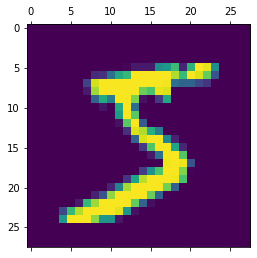

In [8]:
plt.matshow(X_train[0])

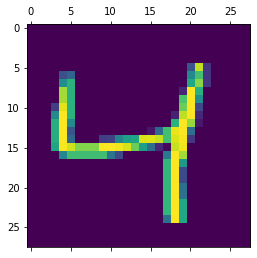

In [10]:
plt.matshow(X_train[2])

In [11]:
y_train[2]

4

In [12]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [13]:
X_train.shape

(60000, 28, 28)

In [22]:
X_train = X_train/255
X_test = X-test/255

NameError: name 'X' is not defined

In [23]:
X_train_flattened = X_train.reshape(len(X_train),28*28)

In [24]:
X_train_flattened.shape

(60000, 784)

In [25]:
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [26]:
X_test_flattened.shape

(10000, 784)

In [27]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [28]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4704 - accuracy: 0.8756
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3047 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2838 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2738 - accuracy: 0.9229
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2666 - accuracy: 0.9257


In [30]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 46.2657 - accuracy: 0.9165


[46.2657356262207, 0.9164999723434448]

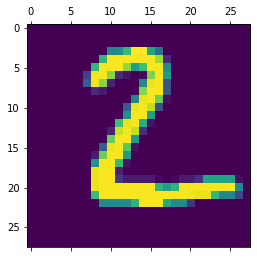

In [36]:
plt.matshow(X_test[1])

In [37]:
y_predicted = model.predict(X_test_flattened)
y_predicted[1]

array([2.8498074e-25, 0.0000000e+00, 1.0000000e+00, 9.6246600e-04,
       0.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00], dtype=float32)

In [38]:
np.argmax(y_predicted[1])

2

In [39]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[3, 2, 1, 0, 4]

In [42]:
#confusion matrix
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 976,    0,    0,    1,    0,    0,    1,    0,    2,    0],
       [   0, 1121,    5,    1,    1,    1,    3,    0,    3,    0],
       [  77,   83,  839,    3,   11,    0,    4,    1,   12,    2],
       [  36,    4,  246,  713,    1,    3,    0,    2,    5,    0],
       [   6,    1,   14,   18,  928,    0,    7,    0,    8,    0],
       [  63,    7,   40,  266,   32,  455,    8,    0,   20,    1],
       [  83,    3,  345,    1,   59,   26,  440,    0,    1,    0],
       [  24,   18,   73,  400,   67,    3,    0,  439,    4,    0],
       [  19,   28,  113,  181,   26,   76,   23,   11,  496,    1],
       [  14,   10,    4,  113,  545,    3,    0,  163,   77,   80]])>

Text(69.0, 0.5, 'Truth')

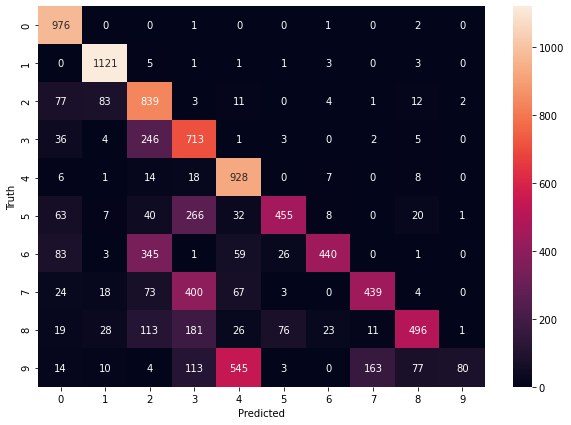

In [43]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [44]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2713 - accuracy: 0.9232
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1239 - accuracy: 0.9633
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0864 - accuracy: 0.9732
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0666 - accuracy: 0.9798
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0511 - accuracy: 0.9844


In [45]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 13.9084 - accuracy: 0.9763


[13.90836238861084, 0.9763000011444092]

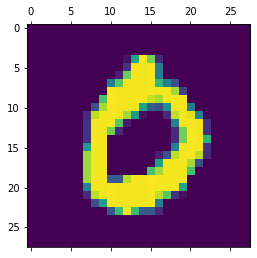

In [53]:
plt.matshow(X_test[3])

In [54]:
y_predicted[3]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [55]:
np.argmax(y_predicted[3])

0

Text(69.0, 0.5, 'Truth')

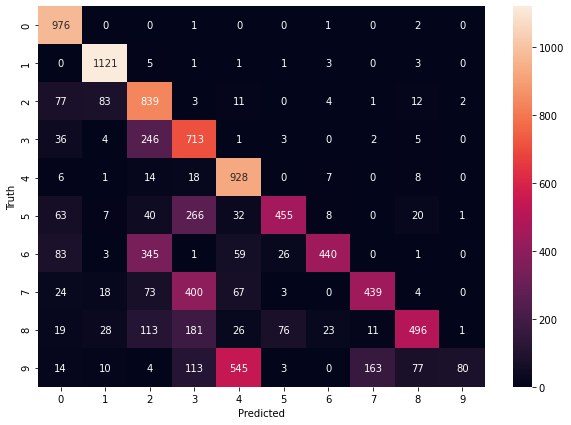

In [56]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')